In [9]:
import matplotlib.pyplot as plt
import numpy as np

## Experimental data

In [76]:
R = 8.31
rho = 13500

dd = 0.5 * 0.1 #cm
dt = 0.01

In [161]:
Pshot = np.array([7.585 - 5.85, 7.56 - 5.73, 7.19 - 5.8,  7.7 - 5.245, 7.76 - 5.61,
                 7.85 - 5.55, 7.925 - 5.5, 8 - 5.44, 8.1 - 5.32, 8.22 - 5.25, 8.35 - 5.15,
                 8.55 - 4.92, 8.8 - 4.7, 9.2 - 4.345]) # 
Tshot = np.array([23.14, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 40])
Tshot = [T+273 for T in Tshot]


Pscold = np.array([8.955 - 4.55, 8.82 - 4.16, 8.6 - 4.855, 8.38 - 5.05, 8.16 - 5.24,
                  8 - 5.4, 7.83 - 5.55, 7.66 - 5.7])
Tscold = np.array([37, 35.75, 34, 32, 30, 28, 26, 24])
Tscold = [T+273 for T in Tscold]

In [162]:
Pscold

array([4.405, 4.66 , 3.745, 3.33 , 2.92 , 2.6  , 2.28 , 1.96 ])

In [163]:
[np.log(p) for p in Pshot]

[0.5510074133988228,
 0.6043159668533291,
 0.3293037471426008,
 0.8981267612464839,
 0.7654678421395712,
 0.8329091229351039,
 0.8858315243894465,
 0.9400072584914709,
 1.0224509277025455,
 1.0885619528146084,
 1.1631508098056806,
 1.2892326482767595,
 1.4109869737102623,
 1.5800091017432882]

## Plots

In [164]:
xh = Tshot
xc = Tscold

yh = Pshot
yc = Pscold

dy = [dd for i in range(len(Tshot))]
dx = [dt for i in range(len(Tshot))]

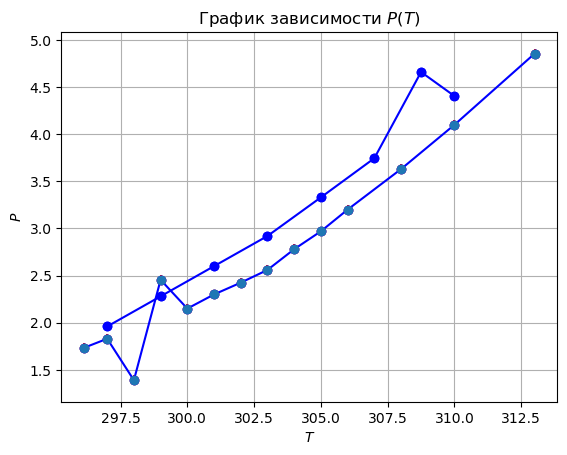

In [165]:
fig, ax = plt.subplots()
plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='o', ecolor='red')
ax.plot(xh, yh, 'bo-')
plt.scatter(xh, yh, color="red")

ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")

ax.set_title('График зависимости $P (T)$')
plt.grid()



plt.xlabel('$T$')
plt.ylabel('$P$')

plt.show()

In [166]:
xh = [1000000/T for T in Tshot]
yh = [np.log(P) for P in Pshot]

xc = [1000000/T for T in Tscold]
yc = [np.log(P) for P in Pscold]

dyh = [dd/p for p in Pshot]
dxh = [dt for i in range(len(Tshot))]

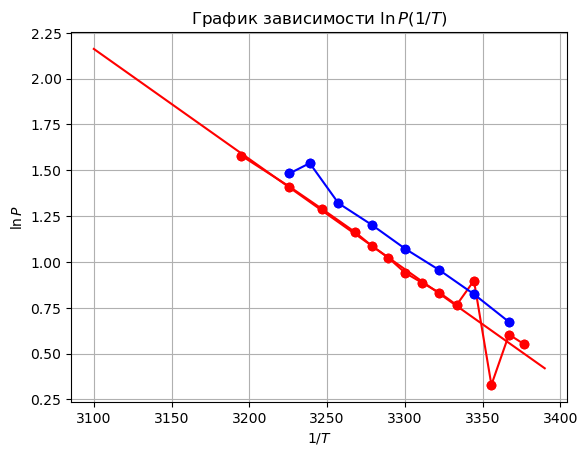

In [167]:
fig, ax = plt.subplots()
ax.plot(xh, yh, 'ro-')
plt.scatter(xh, yh, color="red")

ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")
ax.set_title('График зависимости $\ln P (1/T)$')
plt.grid()


model1 = np.poly1d(np.polyfit(xh, yh, 1))
polyline = np.linspace(3100, 3390)
plt.plot(polyline, model1(polyline), color = 'red')

#model2 = np.poly1d(np.polyfit(xc, yc, 1))
#plt.plot(polyline, model2(polyline), color = 'blue')


plt.xlabel('$1/T$')
plt.ylabel('$\ln P$')

plt.show()